# ITS307 Data Analytics : Autumn Semester 2022
# Practical 10 

# Evaluation metrics

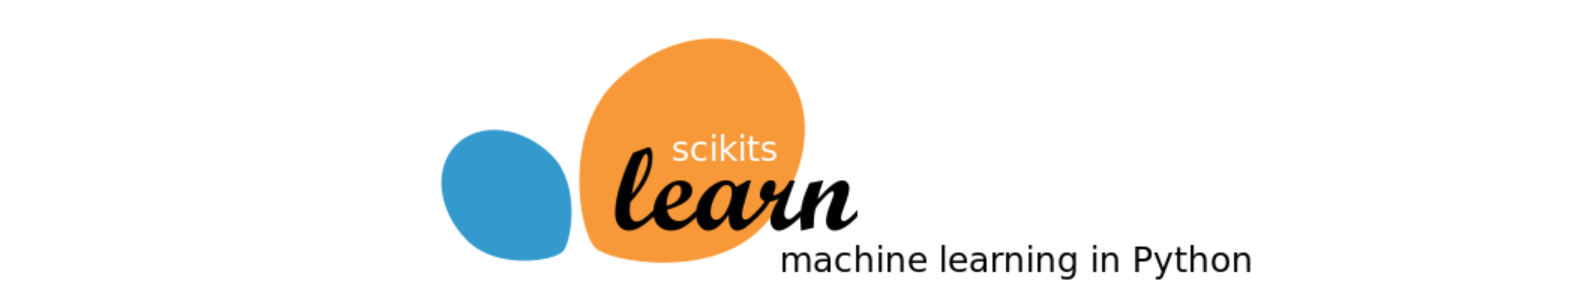

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [131]:
df = pd.read_csv('creditcard.txt')
df


b  30.83       0  u  g   w   v  1.25  t t.1  01  f g.1  00202  0.1  +
0    a  58.67   4.460  u  g   q   h  3.04  t   t   6  f   g  00043  560  +
1    a  24.50   0.500  u  g   q   h  1.50  t   f   0  f   g  00280  824  +
2    b  27.83   1.540  u  g   w   v  3.75  t   t   5  t   g  00100    3  +
3    b  20.17   5.625  u  g   w   v  1.71  t   f   0  f   s  00120    0  +
4    b  32.08   4.000  u  g   m   v  2.50  t   f   0  t   g  00360    0  +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  .. ..  ..    ...  ... ..
684  b  21.08  10.085  y  p   e   h  1.25  f   f   0  f   g  00260    0  -
685  a  22.67   0.750  u  g   c   v  2.00  f   t   2  t   g  00200  394  -
686  a  25.25  13.500  y  p  ff  ff  2.00  f   t   1  t   g  00200    1  -
687  b  17.92   0.205  u  g  aa   v  0.04  f   f   0  f   g  00280  750  -
688  b  35.00   3.375  u  g   c   h  8.29  f   f   0  t   g  00000    0  -

[689 rows x 16 columns]

In [132]:
df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
                        'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
                        'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income',
                        'ApprovalStatus']

In [133]:
df

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        a  58.67   4.460       u            g              q         h   
1        a  24.50   0.500       u            g              q         h   
2        b  27.83   1.540       u            g              w         v   
3        b  20.17   5.625       u            g              w         v   
4        b  32.08   4.000       u            g              m         v   
..     ...    ...     ...     ...          ...            ...       ...   
684      b  21.08  10.085       y            p              e         h   
685      a  22.67   0.750       u            g              c         v   
686      a  25.25  13.500       y            p             ff        ff   
687      b  17.92   0.205       u            g             aa         v   
688      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0             3.04            t        t            6              f       g   
1             1.50            t        f            0              f       g   
2             3.75            t        t            5              t       g   
3             1.71            t        f            0              f       s   
4             2.50            t        f            0              t       g   
..             ...          ...      ...          ...            ...     ...   
684           1.25            f        f            0              f       g   
685           2.00            f        t            2              t       g   
686           2.00            f        t            1              t       g   
687           0.04            f        f            0              f       g   
688           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
0     00043     560              +  
1     00280     824              +  
2     00100       3              +  
3     00120       0              +  
4     00360       0              +  
..      ...     ...            ...  
684   00260       0              -  
685   00200     394              -  
686   00200       1              -  
687   00280     750              -  
688   00000       0              -  

[689 rows x 16 columns]

## 2.2.  Print summary of the dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  ApprovalStatus  689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


## 2.3. Check null values for all the colums in the dataset

In [135]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [136]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [137]:
import string
alphabet = string.ascii_letters+string.punctuation
df.columns.str.strip(alphabet).astype(bool).any()
df

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        a  58.67   4.460       u            g              q         h   
1        a  24.50   0.500       u            g              q         h   
2        b  27.83   1.540       u            g              w         v   
3        b  20.17   5.625       u            g              w         v   
4        b  32.08   4.000       u            g              m         v   
..     ...    ...     ...     ...          ...            ...       ...   
684      b  21.08  10.085       y            p              e         h   
685      a  22.67   0.750       u            g              c         v   
686      a  25.25  13.500       y            p             ff        ff   
687      b  17.92   0.205       u            g             aa         v   
688      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0             3.04            t        t            6              f       g   
1             1.50            t        f            0              f       g   
2             3.75            t        t            5              t       g   
3             1.71            t        f            0              f       s   
4             2.50            t        f            0              t       g   
..             ...          ...      ...          ...            ...     ...   
684           1.25            f        f            0              f       g   
685           2.00            f        t            2              t       g   
686           2.00            f        t            1              t       g   
687           0.04            f        f            0              f       g   
688           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
0     00043     560              +  
1     00280     824              +  
2     00100       3              +  
3     00120       0              +  
4     00360       0              +  
..      ...     ...            ...  
684   00260       0              -  
685   00200     394              -  
686   00200       1              -  
687   00280     750              -  
688   00000       0              -  

[689 rows x 16 columns]

In [138]:
df.replace('?',np.nan,inplace=True)
df


Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        a  58.67   4.460       u            g              q         h   
1        a  24.50   0.500       u            g              q         h   
2        b  27.83   1.540       u            g              w         v   
3        b  20.17   5.625       u            g              w         v   
4        b  32.08   4.000       u            g              m         v   
..     ...    ...     ...     ...          ...            ...       ...   
684      b  21.08  10.085       y            p              e         h   
685      a  22.67   0.750       u            g              c         v   
686      a  25.25  13.500       y            p             ff        ff   
687      b  17.92   0.205       u            g             aa         v   
688      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0             3.04            t        t            6              f       g   
1             1.50            t        f            0              f       g   
2             3.75            t        t            5              t       g   
3             1.71            t        f            0              f       s   
4             2.50            t        f            0              t       g   
..             ...          ...      ...          ...            ...     ...   
684           1.25            f        f            0              f       g   
685           2.00            f        t            2              t       g   
686           2.00            f        t            1              t       g   
687           0.04            f        f            0              f       g   
688           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
0     00043     560              +  
1     00280     824              +  
2     00100       3              +  
3     00120       0              +  
4     00360       0              +  
..      ...     ...            ...  
684   00260       0              -  
685   00200     394              -  
686   00200       1              -  
687   00280     750              -  
688   00000       0              -  

[689 rows x 16 columns]

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [139]:
df['Age']=df['Age'].astype(float)
df['ZipCode']=df['ZipCode'].astype(float)

In [140]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [141]:
from sklearn.impute import SimpleImputer
numerical_features=df.select_dtypes(include=['float','int'])
numerical_features


Age    Debt  YearsEmployed  CreditScore  ZipCode  Income
0    58.67   4.460           3.04            6     43.0     560
1    24.50   0.500           1.50            0    280.0     824
2    27.83   1.540           3.75            5    100.0       3
3    20.17   5.625           1.71            0    120.0       0
4    32.08   4.000           2.50            0    360.0       0
..     ...     ...            ...          ...      ...     ...
684  21.08  10.085           1.25            0    260.0       0
685  22.67   0.750           2.00            2    200.0     394
686  25.25  13.500           2.00            1    200.0       1
687  17.92   0.205           0.04            0    280.0     750
688  35.00   3.375           8.29            0      0.0       0

[689 rows x 6 columns]

In [142]:
null_data_n = numerical_features[numerical_features.isnull().any(axis=1)]
null_data_n

Age    Debt  YearsEmployed  CreditScore  ZipCode  Income
70   34.83   4.000         12.500            0      NaN       0
82     NaN   3.500          3.000            0    300.0       0
85     NaN   0.375          0.875            0    928.0       0
91     NaN   5.000          8.500            0      0.0       0
96     NaN   0.500          0.835            0    320.0       0
201  24.83   2.750          2.250            6      NaN     600
205  71.58   0.000          0.000            0      NaN       0
242  18.75   7.500          2.710            5      NaN   26726
253    NaN   0.625          0.250            0    380.0    2010
269  37.58   0.000          0.000            0      NaN       0
277  24.58  13.500          0.000            0      NaN       0
285    NaN   1.500          0.000            2    200.0     105
328    NaN   4.000          0.085            0    411.0       0
329  20.42   0.000          0.000            0      NaN       0
405  40.33   8.125          0.165            2      NaN      18
444    NaN  11.250          0.000            0      NaN    5200
449    NaN   3.000          7.000            0      0.0       1
455  34.58   0.000          0.000            0      NaN       0
499    NaN   4.000          5.000            3    290.0    2279
514    NaN  10.500          6.500            0      0.0       0
591  23.17   0.000          0.000            0      NaN       0
607    NaN   0.040          4.250            0    460.0       0
621  25.58   0.000          0.000            0      NaN       0
625  22.00   7.835          0.165            0      NaN       0

In [143]:
from sklearn.impute import SimpleImputer
categorical_features =df.select_dtypes(include='object')
categorical_features

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        a       u            g              q         h            t   
1        a       u            g              q         h            t   
2        b       u            g              w         v            t   
3        b       u            g              w         v            t   
4        b       u            g              m         v            t   
..     ...     ...          ...            ...       ...          ...   
684      b       y            p              e         h            f   
685      a       u            g              c         v            f   
686      a       y            p             ff        ff            f   
687      b       u            g             aa         v            f   
688      b       u            g              c         h            f   

    Employed DriversLicense Citizen ApprovalStatus  
0          t              f       g              +  
1          f              f       g              +  
2          t              t       g              +  
3          f              f       s              +  
4          f              t       g              +  
..       ...            ...     ...            ...  
684        f              f       g              -  
685        t              t       g              -  
686        t              t       g              -  
687        f              f       g              -  
688        f              t       g              -  

[689 rows x 10 columns]

In [144]:
null_data_c = categorical_features[categorical_features.isnull().any(axis=1)]
null_data_c

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
205      a     NaN          NaN            NaN       NaN            f   
247    NaN       u            g              c        bb            t   
269      b     NaN          NaN            NaN       NaN            f   
326    NaN       u            g              i        bb            f   
329      b     NaN          NaN            NaN       NaN            f   
345    NaN       u            g              c         v            f   
373    NaN       u            g             aa         v            f   
452    NaN       u            g              w         v            f   
455      b     NaN          NaN            NaN       NaN            f   
478    NaN       y            p            NaN       NaN            f   
488    NaN       u            g              q         v            f   
519    NaN       u            g              k         v            t   
538      b       u            g            NaN       NaN            t   
591      b     NaN          NaN            NaN       NaN            f   
597    NaN       u            g              q         v            f   
600    NaN       y            p            NaN       NaN            f   
621      a     NaN          NaN            NaN       NaN            f   
640    NaN       y            p             cc         v            f   
672    NaN       y            p              e         h            f   

    Employed DriversLicense Citizen ApprovalStatus  
205        f              f       p              +  
247        t              f       g              +  
269        f              f       p              +  
326        f              f       s              -  
329        f              f       p              -  
345        f              t       g              -  
373        f              f       g              -  
452        f              t       g              -  
455        f              f       p              -  
478        f              f       s              -  
488        f              t       g              -  
519        t              f       g              +  
538        f              f       g              -  
591        f              f       p              +  
597        t              f       g              +  
600        f              t       g              -  
621        f              f       p              +  
640        f              t       g              -  
672        f              f       g              -

In [145]:
categorical_features.isna().sum()

Gender            12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
Citizen            0
ApprovalStatus     0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [146]:
#impute missing value here
imputer=SimpleImputer(strategy='most_frequent')
imputed=imputer.fit_transform(categorical_features)
cdf=pd.DataFrame(imputed,columns=categorical_features.columns)
cdf

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        a       u            g              q         h            t   
1        a       u            g              q         h            t   
2        b       u            g              w         v            t   
3        b       u            g              w         v            t   
4        b       u            g              m         v            t   
..     ...     ...          ...            ...       ...          ...   
684      b       y            p              e         h            f   
685      a       u            g              c         v            f   
686      a       y            p             ff        ff            f   
687      b       u            g             aa         v            f   
688      b       u            g              c         h            f   

    Employed DriversLicense Citizen ApprovalStatus  
0          t              f       g              +  
1          f              f       g              +  
2          t              t       g              +  
3          f              f       s              +  
4          f              t       g              +  
..       ...            ...     ...            ...  
684        f              f       g              -  
685        t              t       g              -  
686        t              t       g              -  
687        f              f       g              -  
688        f              t       g              -  

[689 rows x 10 columns]

In [147]:
cdf.isna().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ApprovalStatus    0
dtype: int64

In [148]:
null_data_f = cdf[cdf.isnull().any(axis=1)]
null_data_f

Empty DataFrame
Columns: [Gender, Married, BankCustomer, EducationLevel, Ethnicity, PriorDefault, Employed, DriversLicense, Citizen, ApprovalStatus]
Index: []

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [149]:
numerical_features.isna().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

In [150]:
imputer=SimpleImputer(strategy='mean')
impute=imputer.fit_transform(numerical_features)
ndf=pd.DataFrame(data=impute,columns=numerical_features.columns)
ndf

Age    Debt  YearsEmployed  CreditScore  ZipCode  Income
0    58.67   4.460           3.04          6.0     43.0   560.0
1    24.50   0.500           1.50          0.0    280.0   824.0
2    27.83   1.540           3.75          5.0    100.0     3.0
3    20.17   5.625           1.71          0.0    120.0     0.0
4    32.08   4.000           2.50          0.0    360.0     0.0
..     ...     ...            ...          ...      ...     ...
684  21.08  10.085           1.25          0.0    260.0     0.0
685  22.67   0.750           2.00          2.0    200.0   394.0
686  25.25  13.500           2.00          1.0    200.0     1.0
687  17.92   0.205           0.04          0.0    280.0   750.0
688  35.00   3.375           8.29          0.0      0.0     0.0

[689 rows x 6 columns]

In [151]:
ndf.isna().sum()

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric = scaler.fit_transform(ndf)
minmax = pd.DataFrame(numeric, columns=ndf.columns)
minmax

Age      Debt  YearsEmployed  CreditScore  ZipCode   Income
0    0.675489  0.159286       0.106667     0.089552   0.0215  0.00560
1    0.161654  0.017857       0.052632     0.000000   0.1400  0.00824
2    0.211729  0.055000       0.131579     0.074627   0.0500  0.00003
3    0.096541  0.200893       0.060000     0.000000   0.0600  0.00000
4    0.275639  0.142857       0.087719     0.000000   0.1800  0.00000
..        ...       ...            ...          ...      ...      ...
684  0.110226  0.360179       0.043860     0.000000   0.1300  0.00000
685  0.134135  0.026786       0.070175     0.029851   0.1000  0.00394
686  0.172932  0.482143       0.070175     0.014925   0.1000  0.00001
687  0.062707  0.007321       0.001404     0.000000   0.1400  0.00750
688  0.319549  0.120536       0.290877     0.000000   0.0000  0.00000

[689 rows x 6 columns]

# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [153]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ordinal=oe.fit_transform(cdf)
ordinaldf=pd.DataFrame(ordinal,columns=oe.feature_names_in_)
ordinaldf.head()

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0     0.0      1.0           0.0            10.0        3.0           1.0   
1     0.0      1.0           0.0            10.0        3.0           1.0   
2     1.0      1.0           0.0            12.0        7.0           1.0   
3     1.0      1.0           0.0            12.0        7.0           1.0   
4     1.0      1.0           0.0             9.0        7.0           1.0   

   Employed  DriversLicense  Citizen  ApprovalStatus  
0       1.0             0.0      0.0             0.0  
1       0.0             0.0      0.0             0.0  
2       1.0             1.0      0.0             0.0  
3       0.0             0.0      2.0             0.0  
4       0.0             1.0      0.0             0.0

In [154]:
cdf.dtypes

Gender            object
Married           object
BankCustomer      object
EducationLevel    object
Ethnicity         object
PriorDefault      object
Employed          object
DriversLicense    object
Citizen           object
ApprovalStatus    object
dtype: object

In [155]:
# cdf=cdf.drop(['ApprovalStatus'], axis=1)

In [156]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ordinal=oe.fit_transform(cdf)
ordinaldf=pd.DataFrame(ordinal,columns=oe.feature_names_in_)
ordinaldf.head()

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0     0.0      1.0           0.0            10.0        3.0           1.0   
1     0.0      1.0           0.0            10.0        3.0           1.0   
2     1.0      1.0           0.0            12.0        7.0           1.0   
3     1.0      1.0           0.0            12.0        7.0           1.0   
4     1.0      1.0           0.0             9.0        7.0           1.0   

   Employed  DriversLicense  Citizen  ApprovalStatus  
0       1.0             0.0      0.0             0.0  
1       0.0             0.0      0.0             0.0  
2       1.0             1.0      0.0             0.0  
3       0.0             0.0      2.0             0.0  
4       0.0             1.0      0.0             0.0

In [157]:
cdf

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        a       u            g              q         h            t   
1        a       u            g              q         h            t   
2        b       u            g              w         v            t   
3        b       u            g              w         v            t   
4        b       u            g              m         v            t   
..     ...     ...          ...            ...       ...          ...   
684      b       y            p              e         h            f   
685      a       u            g              c         v            f   
686      a       y            p             ff        ff            f   
687      b       u            g             aa         v            f   
688      b       u            g              c         h            f   

    Employed DriversLicense Citizen ApprovalStatus  
0          t              f       g              +  
1          f              f       g              +  
2          t              t       g              +  
3          f              f       s              +  
4          f              t       g              +  
..       ...            ...     ...            ...  
684        f              f       g              -  
685        t              t       g              -  
686        t              t       g              -  
687        f              f       g              -  
688        f              t       g              -  

[689 rows x 10 columns]

In [178]:
from sklearn.preprocessing import LabelEncoder
y=cdf['ApprovalStatus']
le=LabelEncoder()
lable=le.fit_transform(y)
lable


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [179]:
target=pd.DataFrame(lable,columns=['ApprovalStatus'])
target

ApprovalStatus
0                 0
1                 0
2                 0
3                 0
4                 0
..              ...
684               1
685               1
686               1
687               1
688               1

[689 rows x 1 columns]

In [180]:
x=pd.concat([ordinaldf,minmax],axis=1)
x

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       0.0      1.0           0.0            10.0        3.0           1.0   
1       0.0      1.0           0.0            10.0        3.0           1.0   
2       1.0      1.0           0.0            12.0        7.0           1.0   
3       1.0      1.0           0.0            12.0        7.0           1.0   
4       1.0      1.0           0.0             9.0        7.0           1.0   
..      ...      ...           ...             ...        ...           ...   
684     1.0      2.0           2.0             4.0        3.0           0.0   
685     0.0      1.0           0.0             1.0        7.0           0.0   
686     0.0      2.0           2.0             5.0        2.0           0.0   
687     1.0      1.0           0.0             0.0        7.0           0.0   
688     1.0      1.0           0.0             1.0        3.0           0.0   

     Employed  DriversLicense  Citizen  ApprovalStatus       Age      Debt  \
0         1.0             0.0      0.0             0.0  0.675489  0.159286   
1         0.0             0.0      0.0             0.0  0.161654  0.017857   
2         1.0             1.0      0.0             0.0  0.211729  0.055000   
3         0.0             0.0      2.0             0.0  0.096541  0.200893   
4         0.0             1.0      0.0             0.0  0.275639  0.142857   
..        ...             ...      ...             ...       ...       ...   
684       0.0             0.0      0.0             1.0  0.110226  0.360179   
685       1.0             1.0      0.0             1.0  0.134135  0.026786   
686       1.0             1.0      0.0             1.0  0.172932  0.482143   
687       0.0             0.0      0.0             1.0  0.062707  0.007321   
688       0.0             1.0      0.0             1.0  0.319549  0.120536   

     YearsEmployed  CreditScore  ZipCode   Income  
0         0.106667     0.089552   0.0215  0.00560  
1         0.052632     0.000000   0.1400  0.00824  
2         0.131579     0.074627   0.0500  0.00003  
3         0.060000     0.000000   0.0600  0.00000  
4         0.087719     0.000000   0.1800  0.00000  
..             ...          ...      ...      ...  
684       0.043860     0.000000   0.1300  0.00000  
685       0.070175     0.029851   0.1000  0.00394  
686       0.070175     0.014925   0.1000  0.00001  
687       0.001404     0.000000   0.1400  0.00750  
688       0.290877     0.000000   0.0000  0.00000  

[689 rows x 16 columns]

# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [161]:
from sklearn.model_selection import train_test_split
X=x
y=x['ApprovalStatus']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train,X_test,y_train,y_test


(     Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
 48      1.0      1.0           0.0             1.0        7.0           0.0   
 678     0.0      1.0           0.0             1.0        7.0           0.0   
 584     1.0      1.0           0.0             5.0        2.0           1.0   
 54      1.0      2.0           2.0            12.0        7.0           1.0   
 312     0.0      1.0           0.0             3.0        7.0           0.0   
 ..      ...      ...           ...             ...        ...           ...   
 647     1.0      1.0           0.0             8.0        3.0           0.0   
 146     0.0      2.0           2.0            10.0        3.0           1.0   
 648     0.0      1.0           0.0             5.0        2.0           0.0   
 534     0.0      2.0           2.0             5.0        2.0           1.0   
 591     1.0      1.0           0.0             1.0        7.0           0.0   
 
      Employed  DriversLicense  Citize

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [162]:
from sklearn.linear_model import LogisticRegression
lre=LogisticRegression()
Logistic=lre.fit(X_train,y_train)
Logistic

LogisticRegression()

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)


KNeighborsClassifier()

# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

In [164]:
knc.score(X_train,y_train)

0.9382940108892922

In [165]:
knc.score(X_test,y_test)

0.927536231884058

In [166]:
y_pred1=knc.predict(X_test)
y_pred1

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0.])

In [167]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,y_pred1)

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(res,annot=True)
plt.show()

In [169]:
lre.score(X_train,y_train)

1.0

In [170]:
lre.score(X_test,y_test)

1.0

In [171]:
y_pred=lre.predict(X_test)
y_pred

array([0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0.])

In [172]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix


array([[61,  0],
       [ 0, 77]], dtype=int64)

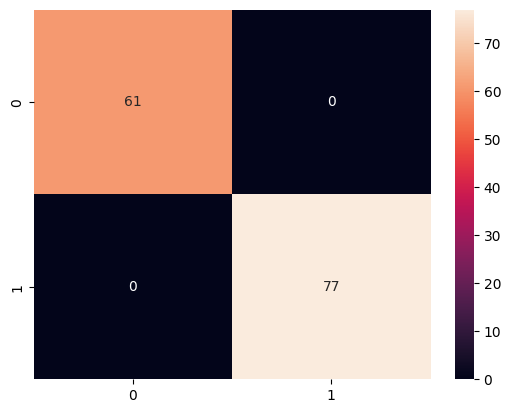

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix,annot=True)
plt.show()


In [174]:
from sklearn.metrics import f1_score,precision_score, recall_score
precision_score=precision_score(y_test, y_pred)
precision_score


1.0

In [175]:
recall_score=recall_score(y_test,y_pred)
recall_score

1.0

In [176]:
f1_score=f1_score(y_test,y_pred)
f1_score

1.0

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

In [177]:
X_sample=[[1,2,1,2,1,4,1,2,1,3,1,2,1,3,1,1]]
lre.predict(X_sample)[0]

C:\Users\Sonam Tshering\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1.0

# 9. Improve your model

- Use any technique to improve your model.